# Implementing Forward Image Rotation and interpolation from scratch

In [25]:
#Importing the required libraries
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

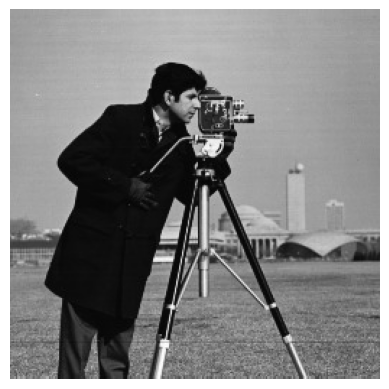

In [26]:
#Reading the image
original_image = cv2.imread("E:\Machine Learning and Deep Learning Practices\Tensorflow + Projects\cameraman.jpg",0)
plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show

In [62]:
def forward_rotation_coordinate_matrix(x,y,theta):
    x_prime = x * math.cos(theta) - y * math.sin(theta)
    y_prime =  x * math.sin(theta) + y * math.cos(theta) 
    return x_prime,y_prime

def inverse_forward_rotation_coordinate_matrix(x,y,theta):
    x_prime = x * math.cos(-theta) - y * math.sin(-theta)
    y_prime =  x * math.sin(-theta) + y * math.cos(-theta) 
    return x_prime,y_prime


def forward_rotation_only(image,theta,interpolation_method=None):
    
    x_min , y_min = (float('inf'),float('inf'))
    x_max,y_max = float('-inf'),float('-inf')

    num_rows = image.shape[0] - 1
    num_cols = image.shape[1] - 1

    #Forward Rotating the cornes of the original image by theta angle 
    original_image_top_left_corner_prime = forward_rotation_coordinate_matrix(0,0,theta)
    original_image_top_right_corner_prime = forward_rotation_coordinate_matrix(0,num_cols,  theta)
    original_image_bottom_left_corner_prime = forward_rotation_coordinate_matrix(num_rows , 0,theta)
    original_image_bottom_right_corner_prime = forward_rotation_coordinate_matrix(num_rows , num_cols,theta)
    

    #Computing the min x y and max x y for the new bounding image
    for corner_prime in [original_image_bottom_left_corner_prime,original_image_bottom_right_corner_prime,original_image_top_left_corner_prime,original_image_top_right_corner_prime]:
        x_prime,y_prime = corner_prime
        
        x_min = x_min if( x_min < x_prime) else x_prime
        y_min = y_min if( y_min < y_prime) else y_prime
        x_max = x_max if( x_max > x_prime) else x_prime
        y_max = y_max if( y_max > y_prime) else y_prime

    #Dimensions for the new bounding image
    new_rows = math.floor(x_max - x_min) + 1 
    new_cols = math.floor(y_max - y_min) + 1

    #Creating an empty new image 
    rotated_image = np.zeros((new_rows,new_cols), dtype=np.uint8)

    if(interpolation_method == None):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                x_prime , y_prime = forward_rotation_coordinate_matrix(i,j,theta)
                x_prime = int(x_prime - x_min)
                y_prime = int(y_prime - y_min)

                #Condition to see if the new coordinated fall in the new image's index
                if 0 <= x_prime < new_rows and 0 <= y_prime < new_cols:
                        rotated_image[x_prime, y_prime] = image[i, j]
                        
    elif(interpolation_method == "nearest_neighbor"):
        rows, cols = image.shape[:2]
        for i in range(new_rows):
            for j in range(new_cols):

                    origin_x, origin_y = -x_min, -y_min

                    x_prime, y_prime = inverse_forward_rotation_coordinate_matrix(i-origin_x,j-origin_y,theta) 
                    
                    if 0 <= x_prime < rows-1 and 0 <= y_prime < cols-1:
                        x_rounded, y_rounded = int(round(x_prime)), int(round(y_prime))
                        rotated_image[i, j] = image[x_rounded, y_rounded]

    return rotated_image

<function matplotlib.pyplot.show(close=None, block=None)>

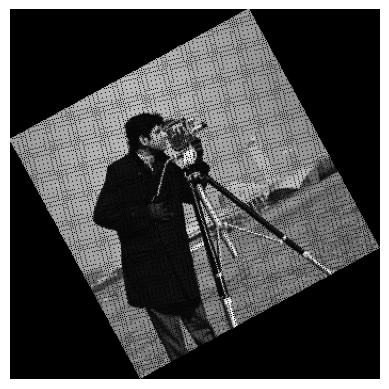

In [63]:
#Without interpolation
rotated_image = forward_rotation_only(original_image,0.5)
plt.imshow(cv2.cvtColor(rotated_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

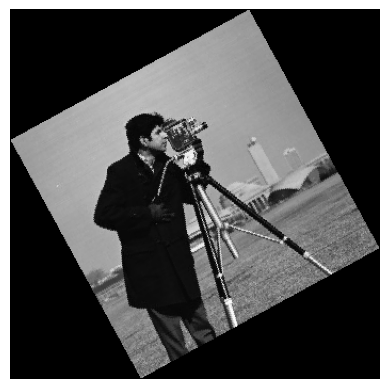

In [64]:
#Without interpolation
rotated_image = forward_rotation_only(original_image,0.5,'nearest_neighbor')
plt.imshow(cv2.cvtColor(rotated_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show